In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing required libraries
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#setting properties to see all the rows in the dataframe in outputs
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Step 1 : Importing the data

In [5]:
leads_data = pd.read_csv("Leads.csv")
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Step 2 : Inspecting the dataframe

In [6]:
leads_data.shape

(9240, 37)

In [7]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
sum(leads_data.duplicated(subset = 'Lead Number')) == 0

True

#### Lead Number has all unique values. Hence the column can be dropped since it will be of no use for our analysis.

In [10]:
leads_data.drop(columns=['Lead Number'],inplace=True)

#### It is given that many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.
#### Since it is given as 'Select' in the columns is as good as null, we will replace that in the data with nulls so that it will be uniform for our analysis.

In [11]:
#replacing all the 'Selects' in the dataframe to null values
leads_data = leads_data.replace('Select',np.nan)

### Checking percentage of nulls/missing data in every column

In [12]:
100*(leads_data.isnull().sum()/leads_data.shape[0])

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.0000

#### We generally do not consider columns with more than 40% of nulls, but the feature 'Lead Quality' seems to be important for our analysis. Therefore, we will keep that column.
#### First we will delete all the columns >55% nulls, then we will delete the columns with >40 and <51. Thus we can keep the feature 'Lead Quality' for further analysis.

In [13]:
#selecting columns with greater than 55% missing data
drop_columns_1 = leads_data.columns[100*(leads_data.isnull().sum()/leads_data.shape[0]) > 55]
drop_columns_1

Index(['How did you hear about X Education', 'Lead Profile'], dtype='object')

In [14]:
#selecting columns with more than 40% but less than 50% nulls in order to keep the 'Lead Quality' column for further analysis.
drop_columns_2 = leads_data.columns[(100*(leads_data.isnull().sum()/leads_data.shape[0]) > 40) & (100*(leads_data.isnull().sum()/leads_data.shape[0]) <51)]
drop_columns_2

Index(['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score'], dtype='object')

In [15]:
#dropping the columns 
leads_data.drop(columns=drop_columns_1,inplace=True)
leads_data.drop(columns=drop_columns_2,inplace=True)

In [16]:
### rechecking the dataframe and null value
leads_data.shape

(9240, 30)

In [17]:
100*(leads_data.isnull().sum()/leads_data.shape[0])

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

### Now, from the remaining columns, we will analyse the missing values in each column.

#### Col : Lead Quality

In [18]:
#checking the distibution of data in the column
leads_data['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

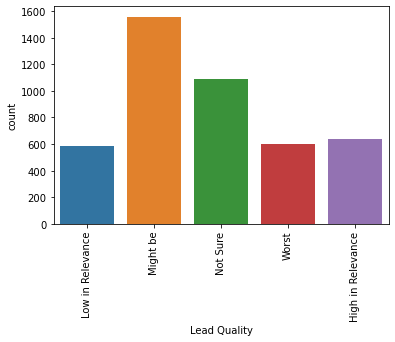

In [19]:
#visualizing distibution of data in the column
sns.countplot(leads_data['Lead Quality'])
plt.xticks(rotation=90)
plt.show()

#### Nulls in this column can be assumned that the prospect was not sure of his decision, hence we will impute this column with 'Not Sure'

In [20]:
leads_data['Lead Quality'].fillna('Not Sure',inplace=True)

#### Col : City

In [21]:
#checking the distibution of data in the column
leads_data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

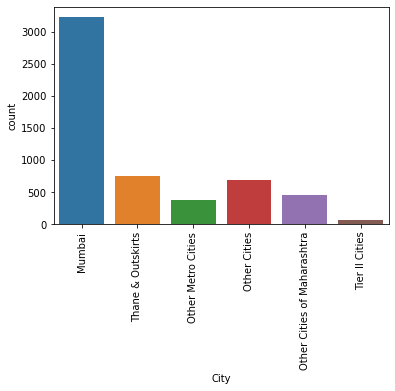

In [22]:
#visualizing distibution of data in the column
sns.countplot(leads_data['City'])
plt.xticks(rotation=90)
plt.show()

#### Since the share of 'Mumbai' is much much higher than other values in the data, it is reasonable to conisder the missing values as 'Mumbai' since it will not affect the distribution much.

In [23]:
leads_data['City'].fillna('Mumbai',inplace=True)

#### Col : Tags

In [24]:
#checking the distibution of data in the column
leads_data['Tags'].value_counts()

Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch with EINS                                     12
Lost to Others

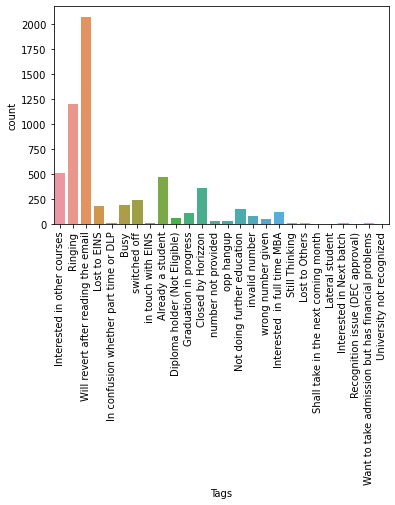

In [25]:
#visualizing distibution of data in the column
sns.countplot(leads_data['Tags'])
plt.xticks(rotation=90)
plt.show()

#### We can safely assume that the null values will also be 'Will revert after reading the email' based on the distribution above.

In [26]:
leads_data['Tags'].fillna('Will revert after reading the email',inplace=True)

#### Col : Specialization

In [27]:
#checking the distibution of data in the column
leads_data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

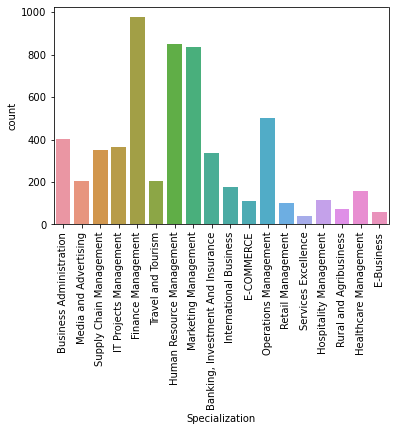

In [28]:
#visualizing distibution of data in the column
sns.countplot(leads_data['Specialization'])
plt.xticks(rotation=90)
plt.show()

#### On seeing the data, we cannot identify any one value standingout to which we can allocate all the missing values. 
#### Using business logic, there may be many reasons why the specialization is empty. Hence we will put the unknown ones as 'Unknown'

In [29]:
leads_data['Specialization'].fillna('Unknown',inplace=True)

#### Col : Country

In [30]:
#checking the distibution of data in the column
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
France                     6
Oman                       6
unknown                    5
Canada                     4
Germany                    4
South Africa               4
Nigeria                    4
Kuwait                     4
Sweden                     3
Netherlands                2
Italy                      2
Uganda                     2
Philippines                2
Ghana                      2
Bangladesh                 2
Asia/Pacific Region        2
Belgium                    2
China                      2
Indonesia                  1
Russia                     1
Denmark                    1
Malaysia                   1
Sri Lanka                  1
Kenya                      1
Liberia       

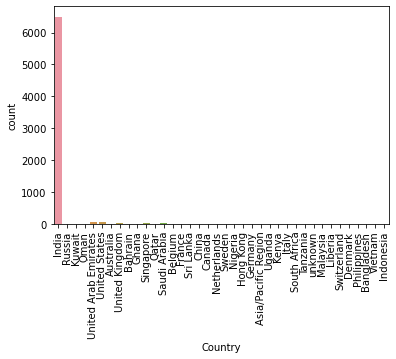

In [31]:
#checking the distibution of data in the column
sns.countplot(leads_data['Country'])
plt.xticks(rotation=90)
plt.show()

#### Since more than 90% of the entries are 'India' we can impute the null values as 'India' to maintain the distribution.

In [32]:
leads_data['Country'].fillna('India',inplace=True)

#### Col : What is your current occupation

In [33]:
#checking the distibution of data in the column
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

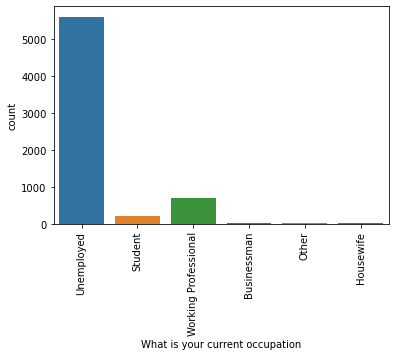

In [34]:
#visualizing distibution of data in the column
sns.countplot(leads_data['What is your current occupation'])
plt.xticks(rotation=90)
plt.show()

#### Since more than 90% of the entries are 'Unemployed' we can impute the null values as 'Unemployed' to maintain the distribution.

In [35]:
leads_data['What is your current occupation'].fillna('Unemployed',inplace=True)

#### Col : What matters most to you in choosing a course

In [36]:
#checking the distibution of data in the columnl
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

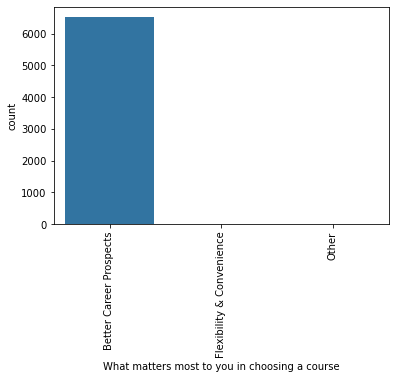

In [37]:
#visualizing distibution of data in the column
sns.countplot(leads_data['What matters most to you in choosing a course'])
plt.xticks(rotation=90)
plt.show()

#### Since more than 90% of the entries are 'Better Career Prospects' we can impute the null values as 'Better Career Prospects' to maintain the distribution.

In [38]:
leads_data['What matters most to you in choosing a course'].fillna('Better Career Prospects',inplace=True)

In [39]:
100*(leads_data.isnull().sum()/leads_data.shape[0])

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

### Now imputing the numerical columns.

In [40]:
leads_data[['TotalVisits','Page Views Per Visit']].describe()

,TotalVisits,Page Views Per Visit
count,9103.000000,9103.000000
mean,3.445238,2.362820
std,4.854853,2.161418
min,0.000000,0.000000
25%,1.000000,1.000000
50%,3.000000,2.000000
75%,5.000000,3.000000
max,251.000000,55.000000


In [41]:
#replacing nulls in numerical columns with their medians
leads_data['TotalVisits'].fillna(3.0,inplace=True)
leads_data['Page Views Per Visit'].fillna(2.0,inplace=True)

### Imputing remaining nulls in the data

In [42]:
100*(leads_data.isnull().sum()/leads_data.shape[0])

Prospect ID                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.000000
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.000000
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Fo

In [43]:
#since there are less than 1.5% of nulls remaining, we can drop those rows
leads_data=leads_data.dropna()

In [44]:
100*(leads_data.isnull().sum()/leads_data.shape[0])

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Magazine                                         0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                     

## Step 3 :Checking for Outliers

In [45]:
# Checking for outliers in the continuous variables
num_leads = leads_data[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]

# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
num_leads.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000
mean,3.454575,483.773921,2.368972
std,4.851123,545.519186,2.157526
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,247.000000,2.000000
75%,5.000000,924.000000,3.000000
90%,7.000000,1375.000000,5.000000
95%,10.000000,1557.000000,6.000000
99%,17.000000,1839.000000,9.000000


#### 'TotalVisits' and 'Page Views Per Visit' are the columns that seem to be containing outliers. 'Total Time Spent on Website' appears fine.

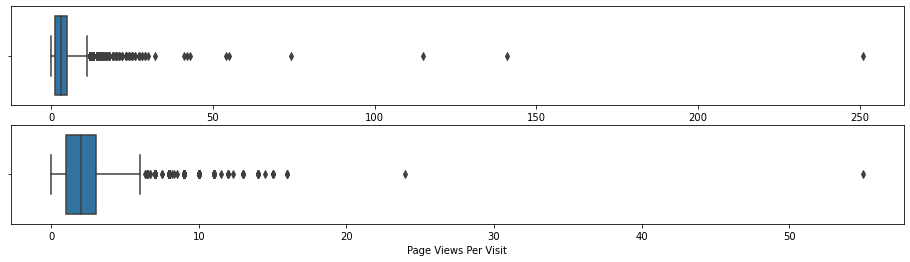

In [46]:
plt.figure(figsize=(16,4))
plt.subplot(2,1,1)
sns.boxplot(leads_data['TotalVisits'])
plt.subplot(2,1,2)
sns.boxplot(leads_data['Page Views Per Visit'])
plt.show()

#### Capping the outliers to 99th percentile.

In [47]:
#capping all the TotalVisits outliers to 99th percentile.
leads_data.loc[leads_data['TotalVisits'] > leads_data['TotalVisits'].quantile(.99), ['TotalVisits']] = leads_data['TotalVisits'].quantile(.99)

In [48]:
#capping all the income outliers to 99th percentile.
leads_data.loc[leads_data['Page Views Per Visit'] > leads_data['Page Views Per Visit'].quantile(.99), ['Page Views Per Visit']] = leads_data['Page Views Per Visit'].quantile(.99)

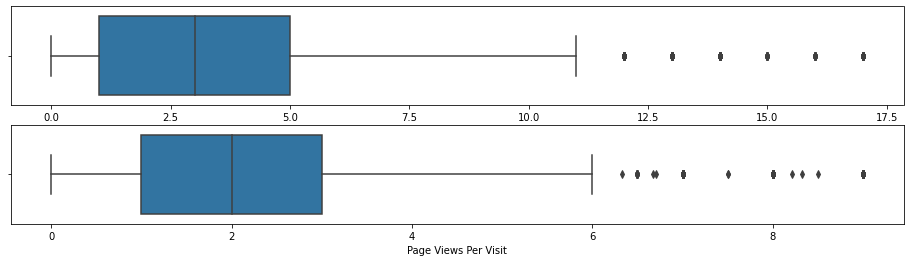

In [49]:
#distibution after dealing with outliers
plt.figure(figsize=(16,4))
plt.subplot(2,1,1)
sns.boxplot(leads_data['TotalVisits'])
plt.subplot(2,1,2)
sns.boxplot(leads_data['Page Views Per Visit'])
plt.show()

## Step 4 : Univariate Analysis

### Since target variable is 'Converted', we will analyse the correlation of each feature with the target.

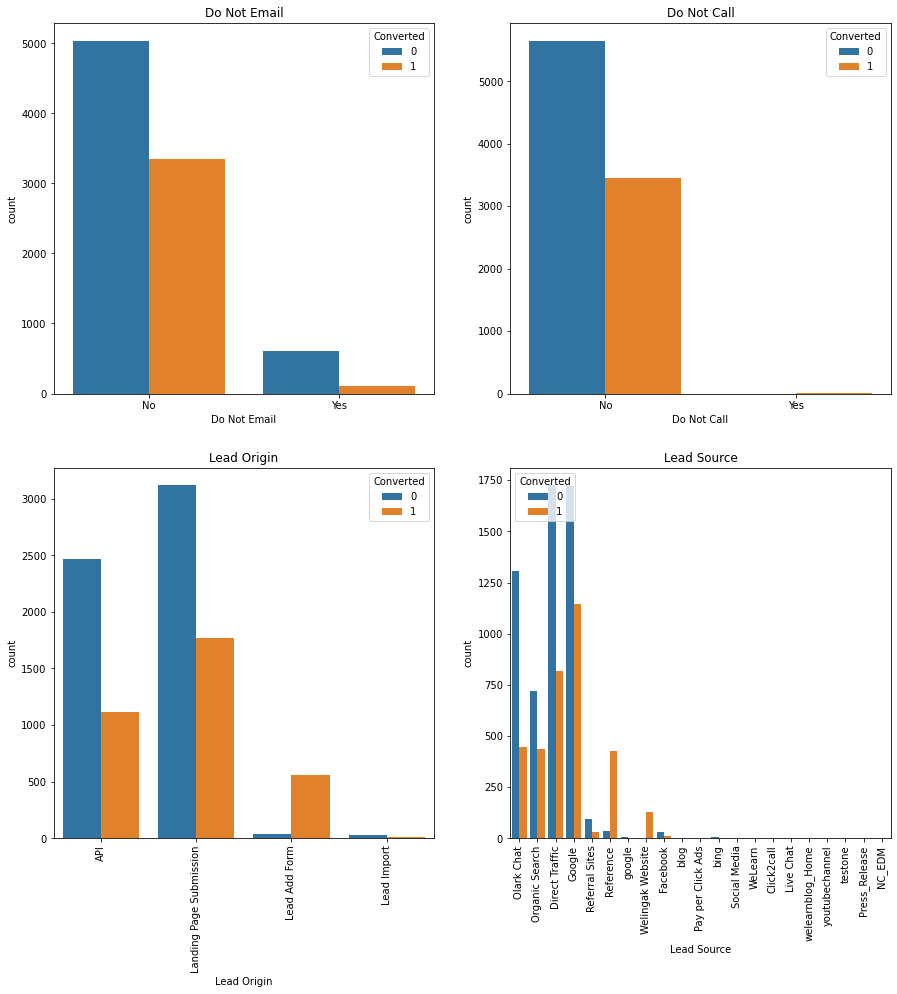

In [50]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data=leads_data)
plt.xticks(rotation=0)
plt.title('Do Not Email')

plt.subplot(2,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data=leads_data)
plt.xticks(rotation=0)
plt.title('Do Not Call')

plt.subplot(2,2,3)
sns.countplot(x='Lead Origin', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('Lead Origin')

plt.subplot(2,2,4)
sns.countplot(x='Lead Source', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('Lead Source')

plt.show()

### Inferences : 
1. 'API' and 'Landing Page Submission' have a good conversion rate.
2. 'Lead Add Form' this origin has very high conversion rate, meaning any lead coming from this origin is most likely to get converted.
3. Imported leads have very low count.
4. In Lead Source, many of the values do not have much values as seen above, it would be better for our further analysis if we combine the least ones into one category called 'Others'.
5. We can merge 'Google' and 'google' since both are same.
6. If the prospect has 'Do not Call' set to Yes, there is a higher chance of getting that prospect converted than not.

#### Optimizing column 'Lead Source'

In [51]:
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             462
Welingak Website      129
Referral Sites        125
Facebook               39
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
welearnblog_Home        1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [52]:
# We will consider all the values from 'blog' onwards to be grouped as 'Others'

leads_data['Lead Source'] = leads_data['Lead Source'].replace(['bing','Click2call','Social Media','Live Chat',
                                                               'Press_Release','testone','blog','NC_EDM','welearnblog_Home',
                                                               'WeLearn','Pay per Click Ads','youtubechannel'],'Others')

In [53]:
# Merge 'Google' and 'google'. This can be achieved by replacing google with Google.
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google','Google')

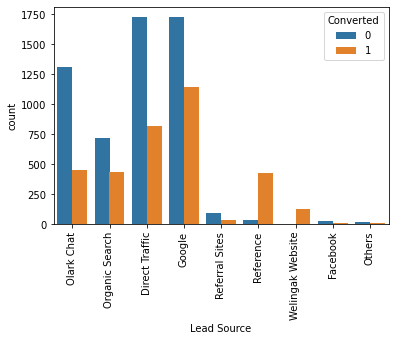

In [54]:
#distribution after optimizing the column
sns.countplot(x='Lead Source', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.show()

### Inferences : 
1. Direct Traffic and Google have a high conversion rate.
2. Leads coming from References and Wellingak Website are most likely to get converted than not.

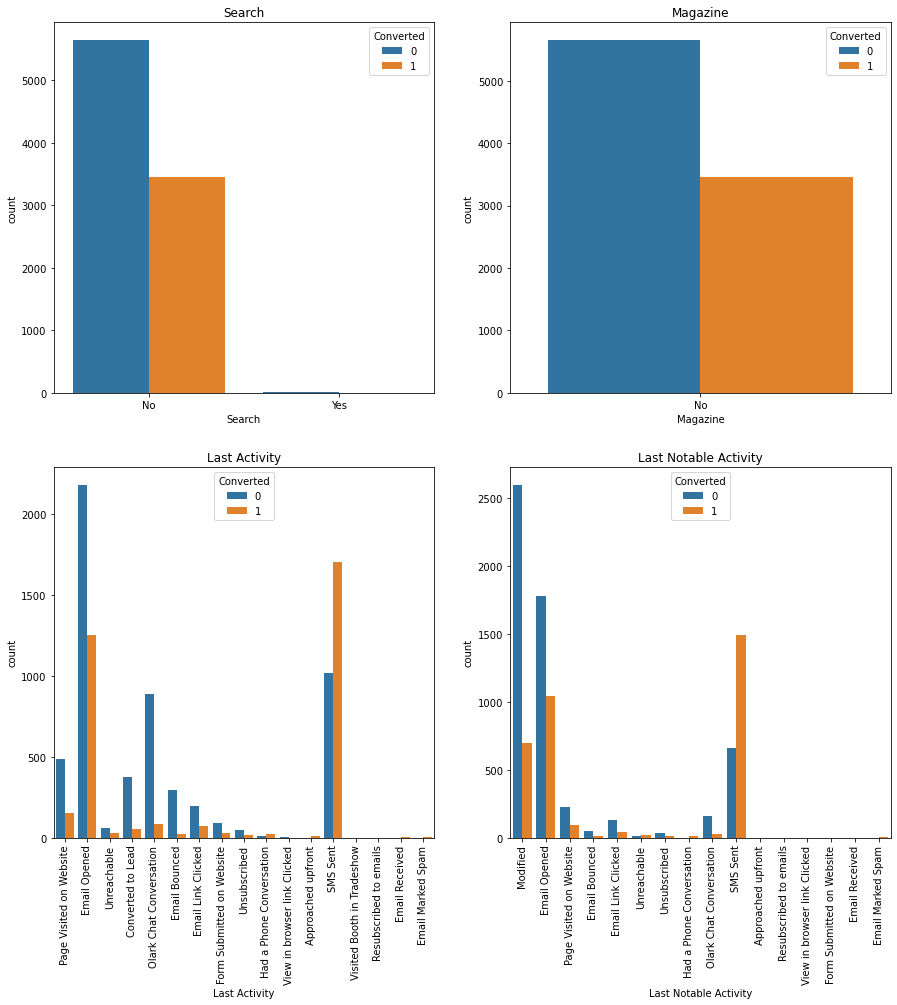

In [55]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x='Search', hue='Converted', data=leads_data)
plt.xticks(rotation=0)
plt.title('Search')

plt.subplot(2,2,2)
sns.countplot(x='Magazine', hue='Converted', data=leads_data)
plt.xticks(rotation=0)
plt.title('Magazine')

plt.subplot(2,2,3)
sns.countplot(x='Last Activity', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('Last Activity')

plt.subplot(2,2,4)
sns.countplot(x='Last Notable Activity', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('Last Notable Activity')

plt.show()

### Inferences : 
1. In 'Search' and 'Magazine' most of the data if not all of it is 'No'. So, we cannot have any such conclusions from these columns.
2. As we can see above, 'Last Activity' and 'Last Notable Activity', most of the entries seem to be the same values. We can remove one of the columns from our Analysis. 
3. Since 'Last Activity' had some missing values intially, we will drop that column.
4. In 'Last Activity', some of the values at the end do not have much values as seen above, it would be better for our further analysis if we combine the least ones into one category called 'Others'.

In [56]:
#dropping column 'Last Activity' since it is highly correlated with 'Last Notable Activity'
leads_data.drop(columns=['Last Activity'],inplace=True)

#### Optimizing column 'Last Notable Activity'

In [57]:
# We will consider all the values <100 counts to be grouped as 'Others'
leads_data['Last Notable Activity'] = leads_data['Last Notable Activity'].replace(['Email Marked Spam','Email Received','Resubscribed to emails',
                                                                  'View in browser link Clicked','Form Submitted on Website',
                                                                  'Approached upfront'],'Others')

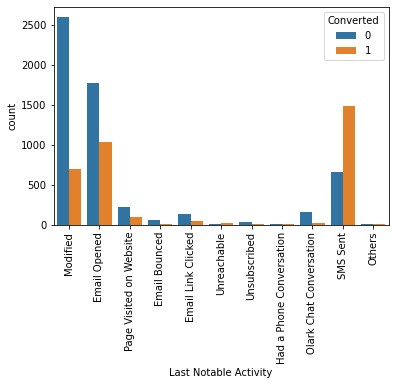

In [58]:
#distribution after optimizing the column
sns.countplot(x='Last Notable Activity', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.show()

### Inferences : 
1. If the Last Activity is Email Opened or SMS Sent, there is a high chance that prospect is converted.
2. If SMS is sent there is more chance that prospect is converted than not.

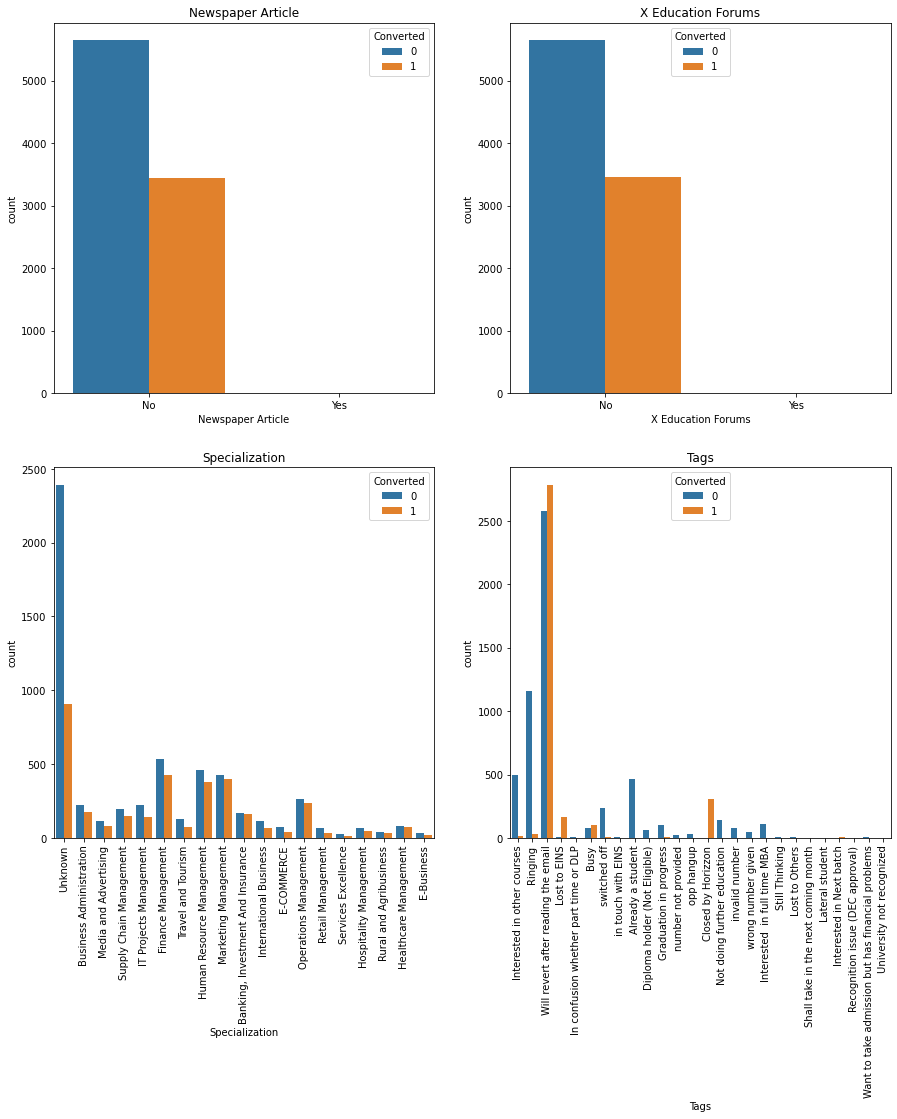

In [59]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data=leads_data)
plt.xticks(rotation=0)
plt.title('Newspaper Article')

plt.subplot(2,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data=leads_data)
plt.xticks(rotation=0)
plt.title('X Education Forums')

plt.subplot(2,2,3)
sns.countplot(x='Specialization', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('Specialization')

plt.subplot(2,2,4)
sns.countplot(x='Tags', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('Tags')

plt.show()

### Inferences : 
1. In 'Newspaper Article' and 'X Education Forums' most of the data is 'No'. So, we cannot have any such conclusions from these columns.
2. There is no specialization that stands out in this analysis. THe data is very diverse.
3. In 'Tags', some of the values at the end do not have much values as seen above, it would be better for our further analysis if we combine the least ones into one category called 'Others'.

#### Optimizing column 'Tags'

In [60]:
# We will consider all the values <100 counts to be grouped as 'Others'
leads_data['Tags'] = leads_data['Tags'].replace(['invalid number','Diploma holder (Not Eligible)','wrong number given',
                                                 'opp hangup','number not provided','in touch with EINS','Lost to Others',
                                                 'Want to take admission but has financial problems','Still Thinking',
                                                 'Interested in Next batch','In confusion whether part time or DLP',
                                                 'Lateral student','University not recognized',
                                                 'Shall take in the next coming month',
                                                 'Recognition issue (DEC approval)'],'Others')

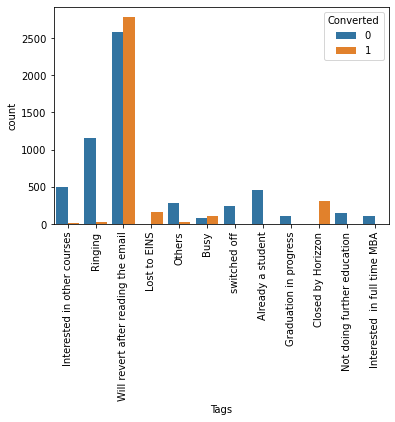

In [61]:
#distribution after optimizing the column
sns.countplot(x='Tags', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.show()

### Inferences :
1. The tag 'Will revert after reading the email' has the highest conversion rate. It is more likely that the prospect is converted than not with this tag.
2. 'Closed by Horizon' and 'Lost to EINS' are also tags that is more likely to convert than not.

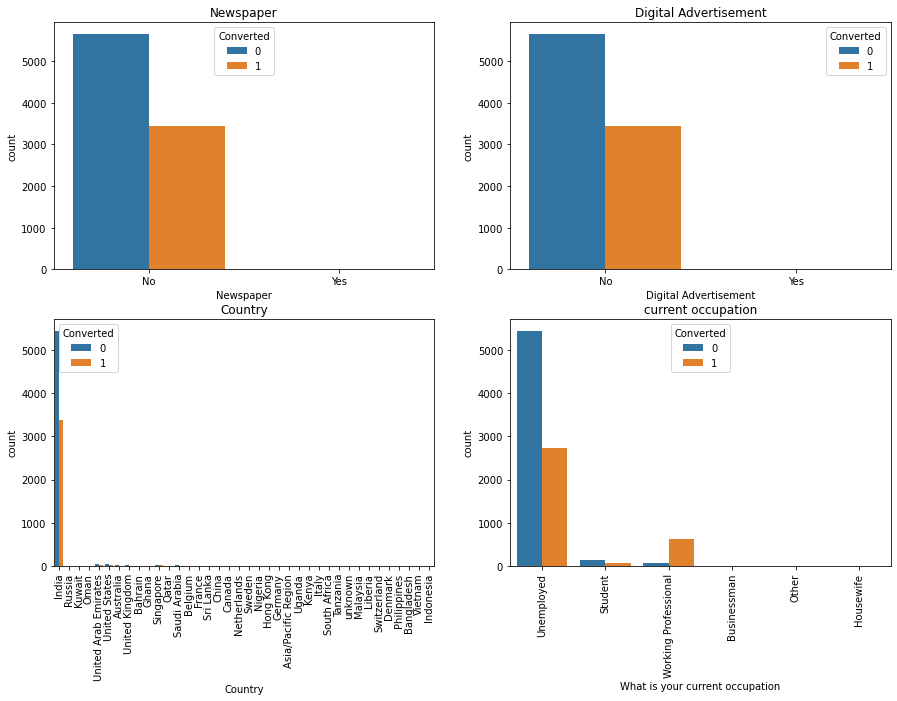

In [62]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x='Newspaper', hue='Converted', data=leads_data)
plt.xticks(rotation=0)
plt.title('Newspaper')

plt.subplot(2,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data=leads_data)
plt.xticks(rotation=0)
plt.title('Digital Advertisement')

plt.subplot(2,2,3)
sns.countplot(x='Country', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('Country')

plt.subplot(2,2,4)
sns.countplot(x='What is your current occupation', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('current occupation')

plt.show()

### Inferences : 
1. In 'Newspaper' and 'Digital Advertisement' most of the data is 'No'. So, we cannot have any such conclusions from these columns.
2. In 'Country' it is clear that majority of the values come from India. And we can club the countries with 1 entries into a single column for ease of use.
3. In current occupation, the number of prospects  who are unemployed is much higher than the other values, but the conversion rate for Unemployed prospects is not that high.
4. Whereas, if a prospect is a Working Professional, there is a very high chance of him getting converted.

#### Optimizing column 'Country'

In [63]:
# We will consider all the values from 'Approached upfront' onwards to be grouped as 'Others'
leads_data['Country'] = leads_data['Country'].replace(['Canada','Germany','South Africa','Kuwait','Nigeria','Sweden',
                                                       'Italy','Uganda','Philippines','Ghana','Bangladesh','Netherlands',
                                                       'China','Belgium','Asia/Pacific Region','Sri Lanka','Kenya',
                                                       'Russia','Malaysia','Indonesia','Tanzania','Liberia','Switzerland',
                                                       'Denmark','Vietnam','unknown'],'Others')

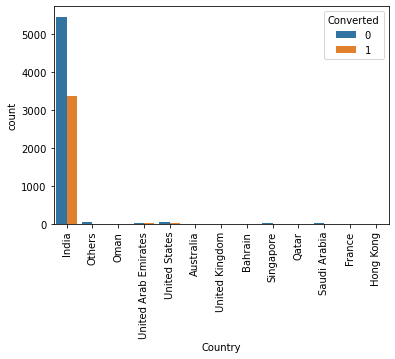

In [64]:
#distribution after optimizing the column
sns.countplot(x='Country', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.show()

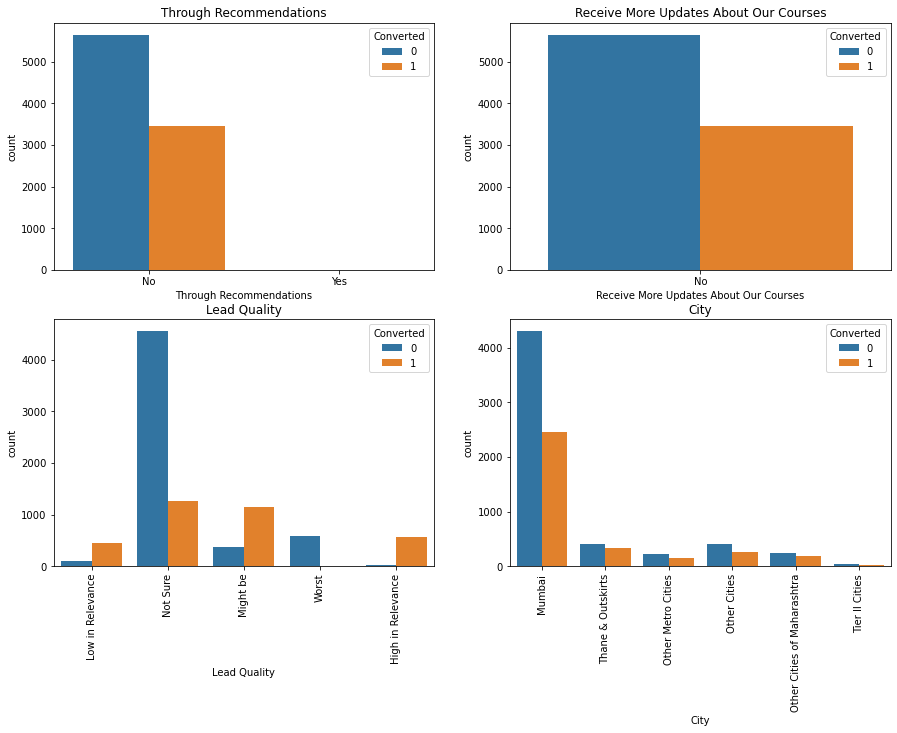

In [65]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data=leads_data)
plt.xticks(rotation=0)
plt.title('Through Recommendations')

plt.subplot(2,2,2)
sns.countplot(x='Receive More Updates About Our Courses', hue='Converted', data=leads_data)
plt.xticks(rotation=0)
plt.title('Receive More Updates About Our Courses')

plt.subplot(2,2,3)
sns.countplot(x='Lead Quality', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('Lead Quality')

plt.subplot(2,2,4)
sns.countplot(x='City', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('City')

plt.show()

### Inferences : 
1. In 'Through Recommendations' and 'Receive More Updates About Our Courses' most if not all of the data is 'No'. So, we cannot have any such conclusions from these columns.
2. We can see that 'Lead Quality' is a great indicator for the conversion rate. Both High Relevance and Low Relevance prospects have a higher chance of converting than not.
3. Propsects with a lead quality 'Might Be' also have a higher chance of converting than not.
4. Most of the prospects are from Mumbai city.

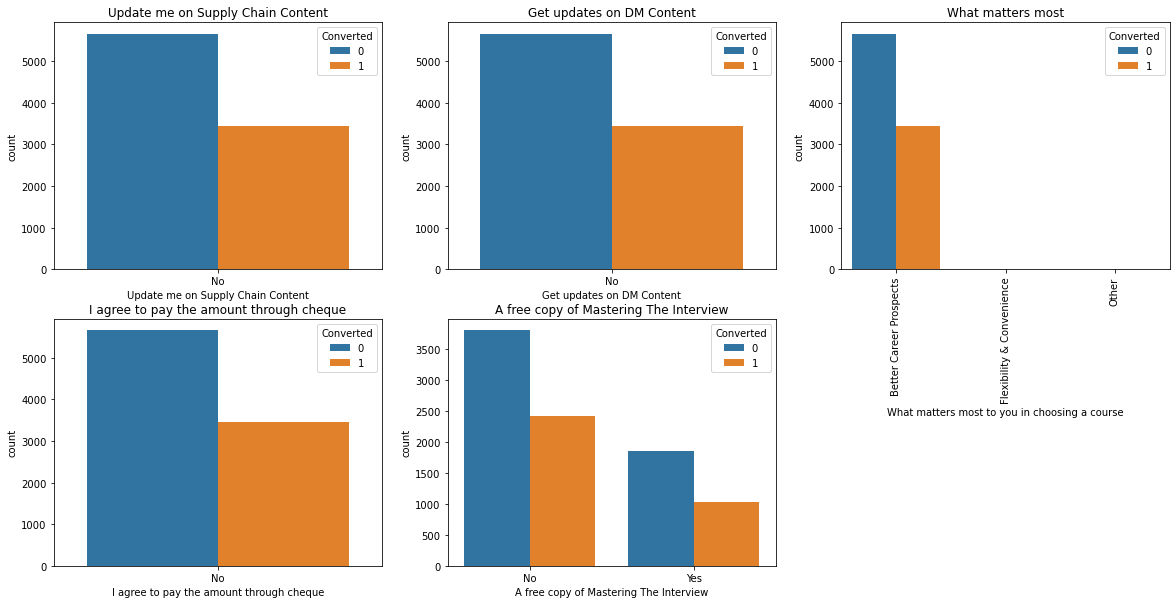

In [66]:
plt.figure(figsize=(20,10))

plt.subplot(2,3,1)
sns.countplot(x='Update me on Supply Chain Content', hue='Converted', data=leads_data)
plt.title('Update me on Supply Chain Content')

plt.subplot(2,3,2)
sns.countplot(x='Get updates on DM Content', hue='Converted', data=leads_data)
plt.title('Get updates on DM Content')

plt.subplot(2,3,3)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data=leads_data)
plt.xticks(rotation=90)
plt.title('What matters most')

plt.subplot(2,3,4)
sns.countplot(x='I agree to pay the amount through cheque', hue='Converted', data=leads_data)
plt.title('I agree to pay the amount through cheque')

plt.subplot(2,3,5)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data=leads_data)
plt.title('A free copy of Mastering The Interview')

plt.show()

### Inferences : 
1. In 'Update me on Supply Chain Content', 'Get updates on DM Content' and 'I agree to pay the amount through cheque' all of the data is 'No'. So, we cannot have any such conclusions from these columns.
2. The number of people not opting for a free copy of Mastering the Interview is higher that the ones who opt for it.
3. Most of the data in 'What matters most to you in choosing a course' column is also coming from a single data point 'Better Career Prospects' So there is no much to conclude from this.

### Univariate Analysis of Numerical Columns 

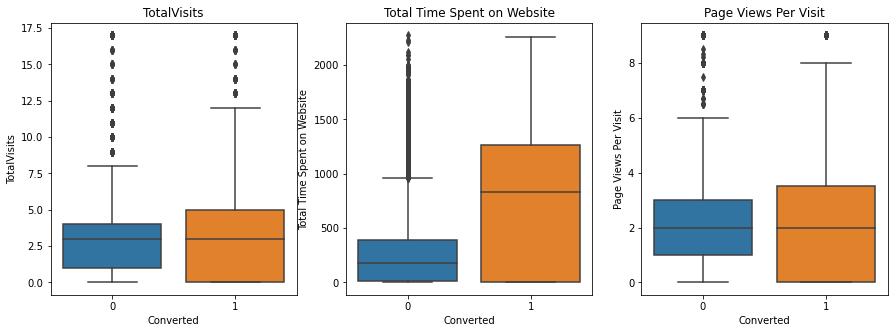

In [67]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.title('TotalVisits')

plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data)
plt.title('Total Time Spent on Website')

plt.subplot(1,3,3)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.title('Page Views Per Visit')

plt.show()

### Inferences : 
1. Propsects who spend more time on the website are most likely to convert than not.
2. Propects having higher number of total visits are more likely to convert.

### Bivariate Analysis

In [72]:
cont_cols = [i for i in leads_data.columns if leads_data[i].dtype != 'O'] #finding the continous cols in the dataframe
cont_cols #storing it in a list

['Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

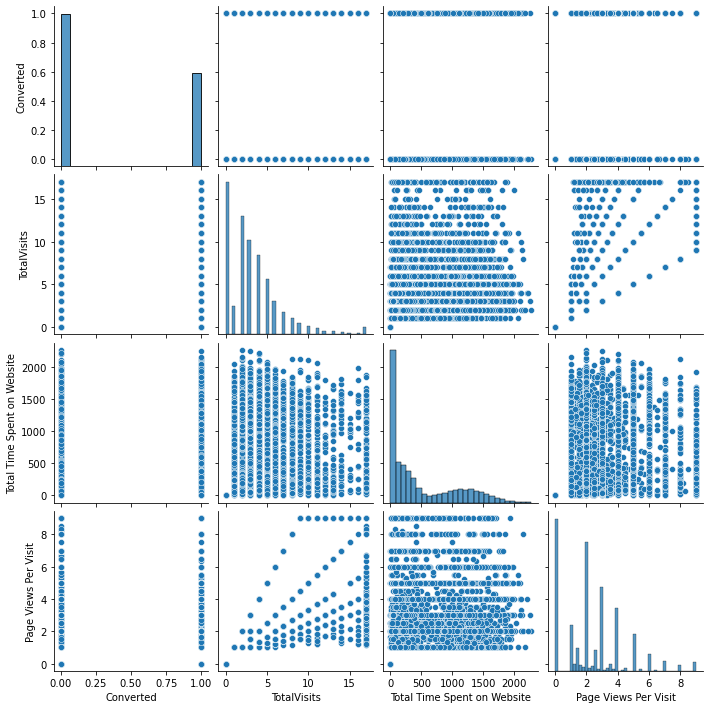

In [74]:
sns.pairplot(leads_data[cont_cols])
plt.show()

### Inferences : 
1. The total time spent by the leads on the website decreases as their total number visits increases.

### As we have seen from the abova analysis, there are some features where most if not all the values are same. Such columns will not be able to contribute much to our analysis. hence we will be dropping such columns.

In [67]:
drop_columns_3 = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement',
                  'What matters most to you in choosing a course','Through Recommendations',
                  'Receive More Updates About Our Courses','Update me on Supply Chain Content',
                  'Get updates on DM Content','I agree to pay the amount through cheque']

#### Inspecting the data after dropping columns

In [68]:
leads_data.drop(columns=drop_columns_3,inplace=True)

In [69]:
leads_data.shape

(9103, 17)

In [70]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,India,Unknown,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,India,Unknown,Unemployed,Ringing,Not Sure,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,India,Unknown,Unemployed,Will revert after reading the email,Might be,Mumbai,No,Modified


In [71]:
leads_data.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Country', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity'], dtype='object')

## Step 5 : Bivariate Analysis

In [ ]:
## Add steps for bivariate here

## Step 6 : Data Preparation

### Converting some binary variables (Yes/No) to 0/1

In [72]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
leads_data[varlist] = leads_data[varlist].apply(binary_map)

In [73]:
leads_data.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Country,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.0,0,0.0,India,Unknown,Unemployed,Interested in other courses,Low in Relevance,Mumbai,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.0,674,2.5,India,Unknown,Unemployed,Ringing,Not Sure,Mumbai,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,India,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,India,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,India,Unknown,Unemployed,Will revert after reading the email,Might be,Mumbai,0,Modified


###  For categorical variables with multiple levels, create dummy features

In [74]:
#listing categorical columns
categorical_cols= leads_data.select_dtypes(include=['object']).columns
categorical_cols

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Country', 'Specialization', 'What is your current occupation', 'Tags', 'Lead Quality', 'City', 'Last Notable Activity'], dtype='object')

#### Once we create the dummy variable, instead of deleting the first column by ddefault, we are deleting the column which is least important, so as to keep the important data in our analysis 

In [75]:
#Creating dummy variables for every categorical variable
d_1 = pd.get_dummies(leads_data['Lead Origin'], prefix  = 'LeadOrigin')
d_1 = d_1.drop(['LeadOrigin_Lead Import'],axis=1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,d_1],axis=1)

d_2 = pd.get_dummies(leads_data['Lead Source'], prefix  = 'LeadSource')
d_2 = d_2.drop(['LeadSource_Others'],axis=1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,d_2],axis=1)

d_3 = pd.get_dummies(leads_data['Country'], prefix  = 'Country')
d_3 = d_3.drop(['Country_Others'],axis=1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,d_3],axis=1)

d_4 = pd.get_dummies(leads_data['Specialization'], prefix  = 'Specialization')
d_4 = d_4.drop(['Specialization_Services Excellence'],axis=1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,d_4],axis=1)

d_5 = pd.get_dummies(leads_data['What is your current occupation'], prefix  = 'Curr_Occupation')
d_5 = d_5.drop(['Curr_Occupation_Other'],axis=1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,d_5],axis=1)

d_6 = pd.get_dummies(leads_data['Tags'], prefix  = 'Tags')
d_6 = d_6.drop(['Tags_Others'],axis=1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,d_6],axis=1)

d_7 = pd.get_dummies(leads_data['Lead Quality'], prefix  = 'LeadQuality')
d_7 = d_7.drop(['LeadQuality_Worst'],axis=1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,d_7],axis=1)

d_8 = pd.get_dummies(leads_data['City'], prefix  = 'City')
d_8 = d_8.drop(['City_Tier II Cities'],axis=1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,d_8],axis=1)

d_9 = pd.get_dummies(leads_data['Last Notable Activity'], prefix  = 'LastNotableActivity')
d_9 = d_9.drop(['LastNotableActivity_Others'],axis=1)
# Adding the results to the master dataframe
leads_data = pd.concat([leads_data,d_9],axis=1)

In [76]:
#Dropping all the original columns ater creating dummies
leads_data.drop(columns=['Lead Origin', 'Lead Source', 'Country', 'Specialization', 
                         'What is your current occupation', 'Tags', 'Lead Quality', 'City', 'Last Notable Activity'], inplace=True)

In [77]:
#Inspecting data after dummy variable creation
leads_data.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Country_Australia,Country_Bahrain,Country_France,Country_Hong Kong,Country_India,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,LeadQuality_High in Relevance,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [78]:
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 84 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Prospect ID                                       9103 non-null   object 
 1   Do Not Email                                      9103 non-null   int64  
 2   Do Not Call                                       9103 non-null   int64  
 3   Converted                                         9103 non-null   int64  
 4   TotalVisits                                       9103 non-null   float64
 5   Total Time Spent on Website                       9103 non-null   int64  
 6   Page Views Per Visit                              9103 non-null   float64
 7   A free copy of Mastering The Interview            9103 non-null   int64  
 8   LeadOrigin_API                                    9103 non-null   uint8  
 9   LeadOrigin_Landing 

## Step 7 : Test-Train Split

In [79]:
#importing required libraries
from sklearn.model_selection import train_test_split

In [80]:
# Putting feature variable to X
X = leads_data.drop(['Prospect ID','Converted'], axis=1)

X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Country_Australia,Country_Bahrain,Country_France,Country_Hong Kong,Country_India,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,LeadQuality_High in Relevance,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
0,0,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,5.0,674,2.5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [81]:
# Putting response variable to y
y = leads_data['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [82]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Step 8 : Feature Scaling

In [83]:
#importing required libraries
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

#Since this is train data, we will fit and transform the data using fit_transform
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Country_Australia,Country_Bahrain,Country_France,Country_Hong Kong,Country_India,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,LeadQuality_High in Relevance,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
7963,0,0,2.042513,2.486792,0.079748,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5521,1,0,1.123447,-0.836090,2.326042,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1951,0,0,-0.101974,1.828055,0.329337,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1553,0,0,0.204381,1.307999,-0.169840,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9170,0,0,-1.021040,-0.890832,-1.168192,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Checking the Conversion Rate

In [85]:
conversion = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
conversion

37.92156431945513

#### We have a 38% conversion rate

### Looking at Correlations

In [86]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

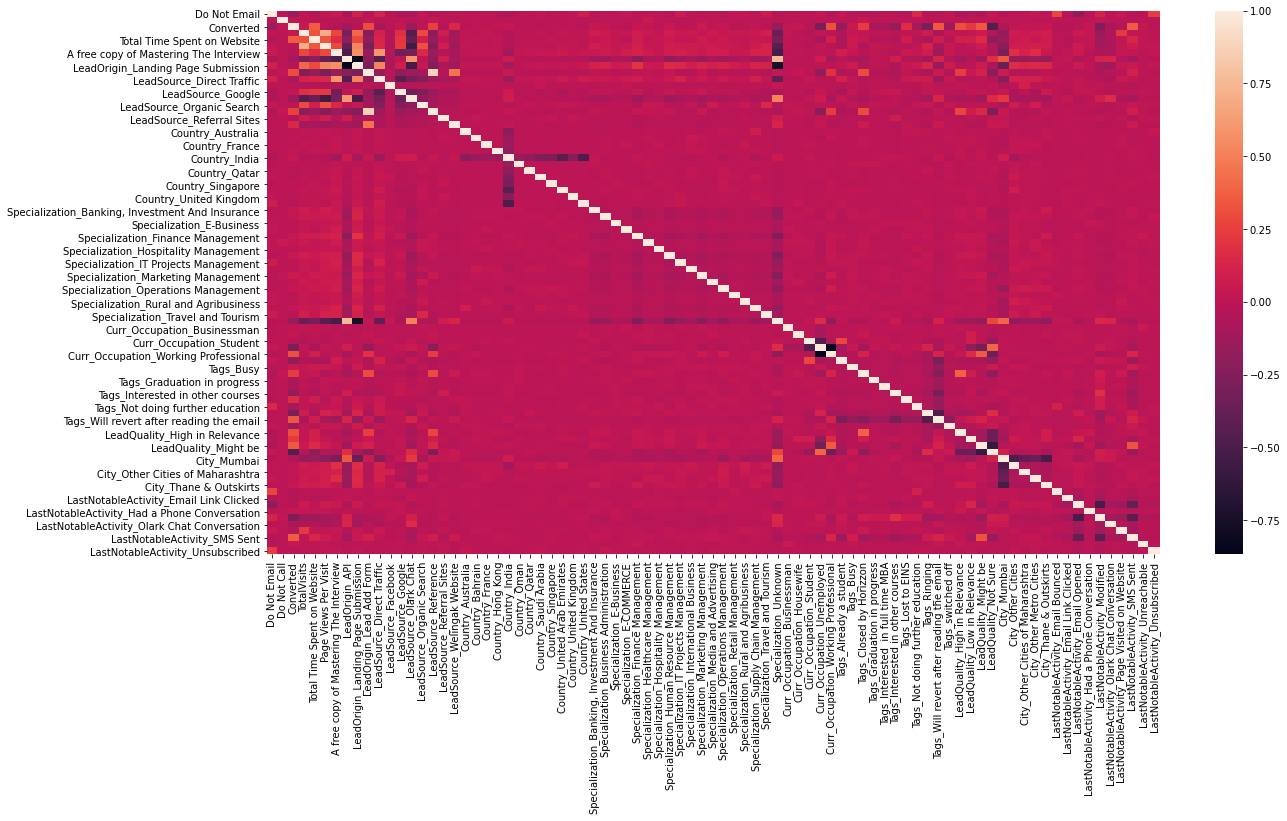

In [87]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(leads_data.corr())
plt.show()

## Step 9 : Feature selection using RFE

In [88]:
#importing required libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [89]:
#running feature selection
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [90]:
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Country_Australia,Country_Bahrain,Country_France,Country_Hong Kong,Country_India,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,LeadQuality_High in Relevance,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
7963,0,0,2.042513,2.486792,0.079748,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5521,1,0,1.123447,-0.836090,2.326042,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1951,0,0,-0.101974,1.828055,0.329337,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1553,0,0,0.204381,1.307999,-0.169840,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9170,0,0,-1.021040,-0.890832,-1.168192,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [91]:
#list of coumns and the corresponding RFE ranking. The ones ranked 1 are selected.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', False, 11),
 ('Do Not Call', False, 63),
 ('TotalVisits', False, 45),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 44),
 ('A free copy of Mastering The Interview', False, 51),
 ('LeadOrigin_API', False, 26),
 ('LeadOrigin_Landing Page Submission', False, 20),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadSource_Direct Traffic', False, 30),
 ('LeadSource_Facebook', False, 25),
 ('LeadSource_Google', False, 31),
 ('LeadSource_Olark Chat', False, 4),
 ('LeadSource_Organic Search', False, 65),
 ('LeadSource_Reference', False, 38),
 ('LeadSource_Referral Sites', False, 23),
 ('LeadSource_Welingak Website', True, 1),
 ('Country_Australia', False, 43),
 ('Country_Bahrain', False, 60),
 ('Country_France', False, 53),
 ('Country_Hong Kong', False, 17),
 ('Country_India', False, 14),
 ('Country_Oman', False, 34),
 ('Country_Qatar', False, 29),
 ('Country_Saudi Arabia', False, 9),
 ('Country_Singapore', False, 58),
 ('Country_United Arab Emirates

In [92]:
#List of columns selected using RFE
col = X_train.columns[rfe.support_]
list(col)

['LeadOrigin_Lead Add Form',
 'LeadSource_Welingak Website',
 'Curr_Occupation_Working Professional',
 'Tags_Busy',
 'Tags_Closed by Horizzon',
 'Tags_Lost to EINS',
 'Tags_Ringing',
 'Tags_Will revert after reading the email',
 'Tags_switched off',
 'LeadQuality_High in Relevance',
 'LeadQuality_Low in Relevance',
 'LeadQuality_Might be',
 'LastNotableActivity_Modified',
 'LastNotableActivity_Olark Chat Conversation',
 'LastNotableActivity_SMS Sent']

### Now that we have a list of 15 columns selected using RFE technique, we will run our first training model with these columns and will further try to optimize of model using p-values and VIF values.

## Step 10 : Model Building

In [93]:
#importing required libraries
import statsmodels.api as sm

### 1st Iteration

In [94]:
# Logistic regression model
X_train_logm1 = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_logm1, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1603.1
Date:                Mon, 12 Jul 2021   Deviance:                       3206.2
Time:                        00:35:57   Pearson chi2:                 2.04e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -4.9256      0.235    -20.956      0.000      -5.386      -4.465
LeadOrigin_Lead Add Form                        0.5945      0.337      1.764      0.078      -0.066       1.255
LeadSource_Welingak Website                     4.2551      1.074      3.964      0.000       2.151       6.359
Curr_Occupation_Working Professional            1.3405      0.279      4.813      0.000       0.795       1.886
Tags_Busy                                       4.3131      0.317     13.627      0.000       3.693       4.933
Tags_Closed by Horizzon                         9.0056      1.045      8.620      0.000       6.958      11.053
Tags_Lost to EINS                               9.3265      0.755     12.357      0.000       7.847      10.806
Tags_Ringing                                   -0.9671      0.320     -3.020      0.003      -1.595      -0.339
Tags_Will revert after reading the email        3.8330      0.226     16.960      0.000       3.390       4.276
Tags_switched off                              -2.5743      0.770     -3.343      0.001      -4.084      -1.065
LeadQuality_High in Relevance                   4.4967      0.346     12.983      0.000       3.818       5.176
LeadQuality_Low in Relevance                    3.6957      0.220     16.830      0.000       3.265       4.126
LeadQuality_Might be                            2.7687      0.146     18.995      0.000       2.483       3.054
LastNotableActivity_Modified                   -1.0102      0.108     -9.320      0.000      -1.223      -0.798
LastNotableActivity_Olark Chat Conversation    -1.2661      0.354     -3.580      0.000      -1.959      -0.573
LastNotableActivity_SMS Sent                    2.2281      0.122     18.212      0.000       1.988       2.468
===============================================================================================================
"""

#### 'LeadOrigin_Lead Add Form' has a p-value higher than 0.05, hence we will drop the column

### 2nd Iteration

In [95]:
#dropping the 'LeadOrigin_Lead Add Form' column
X_train_2 = X_train_logm1.drop(["LeadOrigin_Lead Add Form"], axis = 1)

In [96]:
# Logistic regression model
X_train_logm2 = sm.add_constant(X_train_2)
logm2 = sm.GLM(y_train,X_train_logm2, family = sm.families.Binomial())
res= logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1604.8
Date:                Mon, 12 Jul 2021   Deviance:                       3209.6
Time:                        00:35:57   Pearson chi2:                 2.08e+04
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
const                                          -4.9451      0.235    -21.051      0.000      -5.405      -4.485
LeadSource_Welingak Website                     4.8449      1.020      4.749      0.000       2.845       6.844
Curr_Occupation_Working Professional            1.3814      0.277      4.979      0.000       0.838       1.925
Tags_Busy                                       4.3261      0.317     13.660      0.000       3.705       4.947
Tags_Closed by Horizzon                         9.1505      1.042      8.784      0.000       7.109      11.192
Tags_Lost to EINS                               9.3431      0.755     12.380      0.000       7.864      10.822
Tags_Ringing                                   -0.9691      0.321     -3.023      0.003      -1.597      -0.341
Tags_Will revert after reading the email        3.8534      0.226     17.069      0.000       3.411       4.296
Tags_switched off                              -2.5991      0.770     -3.374      0.001      -4.109      -1.089
LeadQuality_High in Relevance                   4.5970      0.340     13.528      0.000       3.931       5.263
LeadQuality_Low in Relevance                    3.7401      0.219     17.105      0.000       3.312       4.169
LeadQuality_Might be                            2.8078      0.145     19.408      0.000       2.524       3.091
LastNotableActivity_Modified                   -1.0061      0.108     -9.297      0.000      -1.218      -0.794
LastNotableActivity_Olark Chat Conversation    -1.2740      0.355     -3.589      0.000      -1.970      -0.578
LastNotableActivity_SMS Sent                    2.2387      0.122     18.309      0.000       1.999       2.478
===============================================================================================================
"""

#### Checking VIFs

In [97]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_logm2
X.drop(columns=['const'],inplace=True)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif
#drop constant

,Features,VIF
3,Tags_Closed by Horizzon,1.35
2,Tags_Busy,1.05
4,Tags_Lost to EINS,1.05
7,Tags_switched off,1.05
0,LeadSource_Welingak Website,1.04
12,LastNotableActivity_Olark Chat Conversation,1.04
1,Curr_Occupation_Working Professional,0.62
8,LeadQuality_High in Relevance,0.49
9,LeadQuality_Low in Relevance,0.42
13,LastNotableActivity_SMS Sent,0.28


### All the VIFs are very much below 5 and p-values are well below 0.05, hence we can go ahead and consider this model.

### Predicting the probabilities of conversion based on the model above

In [99]:
# importing required libraries
import statsmodels.api as sm

In [100]:
#since we are using stats model, we need to add a constant
X_train_logm2 = sm.add_constant(X_train_2)

In [101]:
#predicting the probabilities of conversion based on the model above
y_train_pred = res.predict(X_train_logm2)#.values.reshape(-1)

In [102]:
#overview of the conversion probabilities
y_train_pred[:10]

7963    0.890059
5521    0.251302
1951    0.847623
1553    0.970838
9170    0.007068
5097    0.251302
8953    0.970838
308     0.251302
5520    0.350025
1045    0.847623
dtype: float64

##### Creating a dataframe with the actual Converted flag and the predicted probabilities

In [103]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
7963,1,0.890059,7963
5521,0,0.251302,5521
1951,1,0.847623,1951
1553,1,0.970838,1553
9170,0,0.007068,9170


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [104]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
7963,1,0.890059,7963,1
5521,0,0.251302,5521,0
1951,1,0.847623,1951,1
1553,1,0.970838,1553,1
9170,0,0.007068,9170,0


## Step 11 : Model Evaluation

### Checking the accuracy of our predictions using various metrics

In [105]:
#importing required libraries
from sklearn import metrics

#### Accuracy

In [106]:
print(metrics.accuracy_score(y_train_pred_final.Converted ,y_train_pred_final.predicted))

0.9155681104833647


#### Confusion matrix 

In [107]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3753  168]
 [ 370 2081]]


In [108]:
# Defining values of TP,TN FP and FN from the confusion matrix for further calculations
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

#### Sensitivity

In [109]:
TP / float(TP+FN)

0.8490412076703386

#### Specificity

In [110]:
TN / float(TN+FP)

0.9571537872991583

#### False Postive Rate

In [111]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04284621270084162


#### Positive Predictive Value

In [112]:
print (TP / float(TP+FP))

0.925300133392619


#### Negative Predictive Value

In [113]:
print (TN / float(TN+ FN))

0.9102595197671598


#### ROC curve

In [114]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [115]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

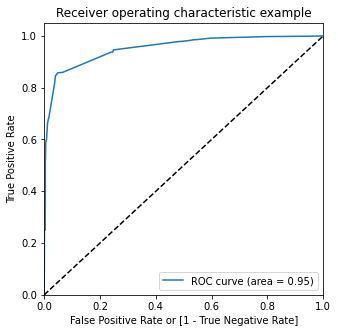

In [116]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

#### Since our ROC curve is pretty close to the optimal space i.e top left corner of the graph, we can consider our model is pretty good.

### Finding Optimal Cutoff Point

#### We have selected a cutoff point of 0.5 arbitrarily, but we can compare the ROC curves of taking different cutoff points and arrive at an optimal cutoff point

In [117]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7963,1,0.890059,7963,1,1,1,1,1,1,1,1,1,1,0
5521,0,0.251302,5521,0,1,1,1,0,0,0,0,0,0,0
1951,1,0.847623,1951,1,1,1,1,1,1,1,1,1,1,0
1553,1,0.970838,1553,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.007068,9170,0,1,0,0,0,0,0,0,0,0,0


In [118]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivty','specificity'])
from sklearn.metrics import confusion_matrix

nums = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in nums:
    con_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    tot=sum(sum(con_mat))
    accuracy = (con_mat[0,0]+con_mat[1,1])/tot
    
    specificity = con_mat[0,0]/(con_mat[0,0]+con_mat[0,1])
    sensitivty = con_mat[1,1]/(con_mat[1,0]+con_mat[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivty,specificity]
print(cutoff_df)

     prob  accuracy  sensitivty  specificity
0.0   0.0  0.384652    1.000000     0.000000
0.1   0.1  0.691777    0.978784     0.512369
0.2   0.2  0.824859    0.938392     0.753889
0.3   0.3  0.913685    0.858017     0.948483
0.4   0.4  0.915411    0.850265     0.956134
0.5   0.5  0.915568    0.849041     0.957154
0.6   0.6  0.915568    0.845369     0.959449
0.7   0.7  0.905681    0.813953     0.963020
0.8   0.8  0.868016    0.682171     0.984188
0.9   0.9  0.840082    0.594859     0.993369


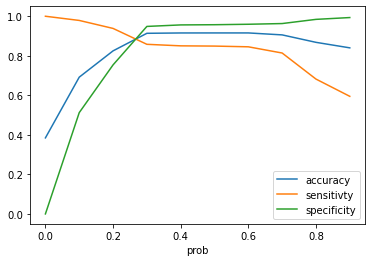

In [119]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivty','specificity'])
plt.show()

### From the above plot we can observe that the optimal cutoff point is around 0.3.
#### Lets perform model evaluation with the cutoff value as 0.3 instead of 0.5.

In [120]:
#creating a df with conversion proabilities per prospectID
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID
7963,1,0.890059,7963
5521,0,0.251302,5521
1951,1,0.847623,1951
1553,1,0.970838,1553
9170,0,0.007068,9170


In [121]:
# Calulate the probability using 0.3 as our threshold value
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Prospect ID,predicted
7963,1,0.890059,7963,1
5521,0,0.251302,5521,0
1951,1,0.847623,1951,1
1553,1,0.970838,1553,1
9170,0,0.007068,9170,0


### Checking the accuracy of our predictions using various metrics

#### Accuracy

In [122]:
print(metrics.accuracy_score(y_train_pred_final.Converted ,y_train_pred_final.predicted))

0.9136848713119899


#### We observe a slight increase in Accuracy as compared to 0.5 threshold value

#### Confusion Matrix

In [123]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3719  202]
 [ 348 2103]]


#### Sensitivity

In [124]:
TP / float(TP+FN)

0.8490412076703386

#### Specificity

In [125]:
TN / float(TN+FP)

0.9571537872991583

#### False Postive Rate

In [126]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04284621270084162


#### Positive Predictive Value

In [127]:
print (TP / float(TP+FP))

0.925300133392619


#### Negative Predictive Value

In [128]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9102595197671598


## Step 12 : Making Predictions on the Test Dataset

### Scaling the test dataset as we did Train dataset

In [129]:
#Using the same scaler as we used for train dataset, we just perform the transform operation the test dataset
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,LeadOrigin_API,LeadOrigin_Landing Page Submission,LeadOrigin_Lead Add Form,LeadSource_Direct Traffic,LeadSource_Facebook,LeadSource_Google,LeadSource_Olark Chat,LeadSource_Organic Search,LeadSource_Reference,LeadSource_Referral Sites,LeadSource_Welingak Website,Country_Australia,Country_Bahrain,Country_France,Country_Hong Kong,Country_India,Country_Oman,Country_Qatar,Country_Saudi Arabia,Country_Singapore,Country_United Arab Emirates,Country_United Kingdom,Country_United States,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Specialization_Unknown,Curr_Occupation_Businessman,Curr_Occupation_Housewife,Curr_Occupation_Student,Curr_Occupation_Unemployed,Curr_Occupation_Working Professional,Tags_Already a student,Tags_Busy,Tags_Closed by Horizzon,Tags_Graduation in progress,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,LeadQuality_High in Relevance,LeadQuality_Low in Relevance,LeadQuality_Might be,LeadQuality_Not Sure,City_Mumbai,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,LastNotableActivity_Email Bounced,LastNotableActivity_Email Link Clicked,LastNotableActivity_Email Opened,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed
3497,0,0,-1.021040,-0.890832,-1.168192,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4044,0,0,-1.021040,-0.890832,-1.168192,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7200,0,0,-0.714685,-0.617119,-0.669016,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1183,0,0,-1.021040,-0.890832,-1.168192,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8216,0,0,1.123447,-0.826966,-0.469346,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [130]:
#dropping the const column from the model
X_train_logm2.drop(columns=['const'],inplace=True)

In [131]:
#Checking if train and test sets have same set of coulumns
col_list = X_train_logm2.columns
col_list

Index(['LeadSource_Welingak Website', 'Curr_Occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'LeadQuality_High in Relevance', 'LeadQuality_Low in Relevance', 'LeadQuality_Might be', 'LastNotableActivity_Modified', 'LastNotableActivity_Olark Chat Conversation', 'LastNotableActivity_SMS Sent'], dtype='object')

In [132]:
X_test_sm = X_test[col_list]
X_test_sm.columns

Index(['LeadSource_Welingak Website', 'Curr_Occupation_Working Professional', 'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing', 'Tags_Will revert after reading the email', 'Tags_switched off', 'LeadQuality_High in Relevance', 'LeadQuality_Low in Relevance', 'LeadQuality_Might be', 'LastNotableActivity_Modified', 'LastNotableActivity_Olark Chat Conversation', 'LastNotableActivity_SMS Sent'], dtype='object')

#### Checking the shapes of test and train datasets

In [133]:
X_test_sm.shape

(2731, 14)

In [134]:
X_train_logm2.shape

(6372, 14)

In [135]:
# adding constant to test set as we are using statsmodel
X_test_sm = sm.add_constant(X_test_sm)

In [136]:
# adding the constant column back to the traning set
X_train_logm2 = sm.add_constant(X_train_logm2)

In [137]:
# making predictions
y_test_pred = res.predict(X_test_sm)

In [138]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3497,0.970838
4044,0.992513
7200,0.002596
1183,0.002596
8216,0.251302


In [139]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [140]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [141]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [142]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [143]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,3497,0.970838
1,1,4044,0.992513
2,0,7200,0.002596
3,0,1183,0.002596
4,0,8216,0.251302


In [144]:
# Renaming the Conversion Probability column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final

,Converted,Prospect ID,Converted_Prob
0,1,3497,0.970838
1,1,4044,0.992513
2,0,7200,0.002596
3,0,1183,0.002596
4,0,8216,0.251302
...,...,...,...
2726,0,6510,0.076021
2727,0,314,0.251302
2728,1,3759,0.999032
2729,1,8043,0.758971


In [145]:
#Determining the converted value based on threshold value determined earlier- 0.3
y_pred_final['Converted_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.30 else 0)
y_pred_final

,Converted,Prospect ID,Converted_Prob,Converted_predicted
0,1,3497,0.970838,1
1,1,4044,0.992513,1
2,0,7200,0.002596,0
3,0,1183,0.002596,0
4,0,8216,0.251302,0
...,...,...,...,...
2726,0,6510,0.076021,0
2727,0,314,0.251302,0
2728,1,3759,0.999032,1
2729,1,8043,0.758971,1


### Prediction Evaluation using various metrics

#### Accuracy

In [146]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.Converted_predicted)

0.9194434273160015

#### Confusion Matrix

In [147]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.Converted_predicted )
confusion2

array([[1641,   89],
       [ 131,  870]], dtype=int64)

In [148]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

#### Sensitivity

In [149]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8691308691308691

#### Specificity

In [150]:
# Let us calculate specificity
TN / float(TN+FP)

0.9485549132947977

### We have achieved the following metrics by our model : 
#### 91.9% Accuracy
#### 86.9% Sensitivity
#### 94.8% Specificty